### *The scope of this project is to predict the knowledge level of users, UNS, based on the following columns: the degree of study time for goal object materials, STG, the degree of repetition number of user for goal object materails, SCG, the degree of study time of user for related objects with goal object, STR, the exam performance of user for related objects with goal object, LPR, and the exam performance of user for goal objects, PEG.*

### *Import necessary data analysis libraries*

In [1]:
import numpy as np
import pandas as pd

### *Import visualization libraries*

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

### *Import the dataset using panda and declare it as df*

In [3]:
df = pd.read_csv('Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.csv')

### *Exploratory Data Analysis, EDA*

In [4]:
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,3
2,0.06,0.06,0.05,0.25,0.33,1
3,0.10,0.10,0.15,0.65,0.30,2
4,0.08,0.08,0.08,0.98,0.24,1


In [6]:
df.describe()

,STG,SCG,STR,LPR,PEG,UNS
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000
mean,0.353141,0.355940,0.457655,0.431342,0.456360,1.684864
std,0.212018,0.215531,0.246684,0.257545,0.266775,0.986195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.265000,0.250000,0.250000,1.000000
50%,0.300000,0.300000,0.440000,0.330000,0.400000,2.000000
75%,0.480000,0.510000,0.680000,0.650000,0.660000,3.000000
max,0.990000,0.900000,0.950000,0.990000,0.990000,3.000000


In [24]:
df.columns

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', ' UNS'], dtype='object')

In [25]:
df.columns = df.columns.str.replace(' ', '') # remove whitespaces found in the df header

In [26]:
df.columns

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', 'UNS'], dtype='object')

<AxesSubplot:>

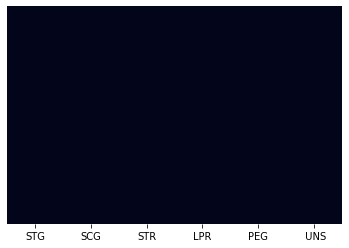

In [15]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False) # this is to check for missing values in the dataset

### *Machine Learning*

### *To slpit the dataset into training and testing set, I imported the train test split from the model selection family*

In [27]:
from sklearn.model_selection import train_test_split 

### *I declared X and y, which is used to split the dataset into train and test set, with the test set taking 30% of the entire dataset, at a random state of 101*

In [28]:
X = df.drop('UNS', axis=1)
y = df['UNS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### *Import the Machine Learning Model, here we use logistic Regression, found in the Linear Model of SKLearn*

In [29]:
from sklearn.linear_model import LogisticRegression

### *Instantiate the Machine Learning Model*

In [30]:
logmodel = LogisticRegression()

### *Fit the training set into the Machine Learning Model*

In [31]:
logmodel.fit(X_train, y_train)

LogisticRegression()

### *Make predictions on new data, that is the test data*

In [34]:
predictions = logmodel.predict(X_test)

### *Display predictions*

In [41]:
predictions

array([2, 1, 1, 1, 1, 2, 1, 3, 1, 2, 3, 3, 0, 2, 1, 2, 3, 3, 1, 0, 1, 2,
       1, 2, 1, 1, 2, 3, 1, 3, 3, 1, 3, 2, 1, 1, 1, 2, 3, 3, 1, 3, 2, 2,
       1, 2, 1, 1, 2, 3, 2, 1, 2, 2, 1, 3, 1, 3, 1, 3, 2, 3, 1, 2, 1, 3,
       1, 2, 1, 2, 3, 3, 1, 2, 1, 0, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 2, 3,
       1, 1, 3, 0, 3, 2, 0, 1, 2, 3, 1, 3, 2, 3, 1, 2, 1, 3, 2, 1, 2, 3,
       3, 1, 2, 1, 2, 1, 0, 1, 1, 3, 1], dtype=int64)

### *Get the confusion matrix and classification report to evaluate the preformance of the Machine Learning Model. These metrics provide valuable insights into how well the model is performing, offering a comprehensive view of its precision across different classes.*

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
print(confusion_matrix(y_test, predictions))

print('\n')
print(classification_report(y_test, predictions))

[[ 6  6  0  0]
 [ 0 38  0  0]
 [ 0  7 31  2]
 [ 0  0  0 31]]


              precision    recall  f1-score   support

           0       1.00      0.50      0.67        12
           1       0.75      1.00      0.85        38
           2       1.00      0.78      0.87        40
           3       0.94      1.00      0.97        31

    accuracy                           0.88       121
   macro avg       0.92      0.82      0.84       121
weighted avg       0.90      0.88      0.87       121



### *The confusion matrix provides a tabular representation of model prediction compared to actual truth across the various classes, with rows representing the actual class and columns, the predicted class*

#### *Interpretation*
#### *In the first row, there are 6 instances in class 0, which are correctly predicted, and 6 instances in class 1, which are incorrectly predicted.*
#### *In the second row, all 38 cases of class 1 were accurately predicted.*
#### *The third row has 40 instances of class 2. The model accurately predicted 31 cases, misclassifying 7 as class 1 and 2 as class 3.*
#### *In the fourth row, all 31 cases of class 3 were accurately predicted.*

### *The classification matrix provides additional information on the performance of the machine learning model*

#### *Precision: The ability of the model to correctly identify positive instances. For example, for class 0, all predicted instances were correct 100% of the time.*
#### *Recall (Sensitivity): The proportion of actual positive instances that were correctly identified by the model. For class 0, only 50% of actual instances were correctly identified.*
#### *F1-score: The harmonic mean of precision and recall. It provides a balance between precision and recall.*
#### *Support: The number of actual occurrences of each class in the dataset.*
#### *Accuracy: Overall accuracy of the model across all classes.*
#### *Macro Avg: The average precision, recall, and F1-score calculated for each class independently and then averaged.*
#### *Weighted Avg: The average precision, recall, and F1-score calculated for each class, weighted by the number of instances in each class.*